In [1]:
import spotipy # install if needed
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# importing other modules in the same folder as .py
# from <filename> import <function>
# import <filename>

In [2]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="8c4c7f70002e481d8695324dc791e84c",
    client_secret="ab99dec388004f3eab891b9ea2f1225b"))

In [3]:
tracks = sp.playlist_tracks("https://open.spotify.com/playlist/6uYt5DwcyaOxxPUundboC2")

In [4]:
def get_tracks_ids_from_playlist(playlist_id):
    
    final_results = []
    result = sp.playlist_tracks(playlist_id)
    final_results.extend(result["items"])
    
    while result["next"]:
        
        result = sp.next(result)
        final_results.extend(result["items"])
        
    ids = [track["track"]["id"] for track in final_results]
    
    # we return only values that are not None:
    return [i for i in ids if i]

In [5]:
get_tracks_ids_from_playlist("https://open.spotify.com/playlist/6uYt5DwcyaOxxPUundboC2")

['74X1epeRufHckhuX1KFD04',
 '1QEEqeFIZktqIpPI4jSVSF',
 '6m4HWTYMRSJkaUuvXTaNmE',
 '2WfaOiMkCvy7F5fcp2zZ8L',
 '0sDqo9UPzPUtu9wEkI3zRB',
 '67Hna13dNDkZvBpTXRIaOJ',
 '2X485T9Z5Ly0xyaghN73ed',
 '1KDsONFxp3YtnJTaLeWFIi',
 '5AhDb4oM6f4YmHPXW123Fg',
 '6cr6UDpkjEaMQ80OjWqEBQ',
 '7E1boGBVKRPqbHuEDXXZ7D',
 '3MODES4TNtygekLl146Dxd',
 '131yybV7A3TmC34a0qE8u8',
 '2LkaNhCrNVmcYgXJeLVmsw',
 '05f8Hg3RSfiPSCBQOtxl3i',
 '3gdewACMIVMEWVbyb8O9sY',
 '5dRwQffP46e2zNsBiEEJ9P',
 '70gbuMqwNBE2Y5rkQJE9By',
 '28VC9MNZSJZOqiAHUU8XSP',
 '38Ngied9rBORlAbLYNCl4k',
 '6pnwfWyaWjQiHCKTiZLItr',
 '2nVHqZbOGkKWzlcy1aMbE7',
 '7BY005dacJkbO6EPiOh2wb',
 '5ihS6UUlyQAfmp48eSkxuQ',
 '1lFC3sMgOcDrVzNh8zXRnl',
 '0hKRSZhUGEhKU6aNSPBACZ',
 '0YveezON7jpiaHA8fnUHxN',
 '6aBUnkXuCEQQHAlTokv9or',
 '6mcxQ1Y3uQRU0IHsvdNLH1',
 '3TO7bbrUKrOSPGRTB5MeCz',
 '7qL6WYHu1148Y58bhgFZC2',
 '72Z17vmmeQKAg8bptWvpVG',
 '7Jh1bpe76CNTCgdgAdBw4Z',
 '3FCto7hnn1shUyZL42YgfO',
 '57zJeqbOA6AHsv2n6BMcm6',
 '1ju7EsSGvRybSNEsRvc7qY',
 '2QVmiA93GVhWNTWQctyY1K',
 

In [6]:
sp.audio_features('2LkaNhCrNVmcYgXJeLVmsw')

[{'danceability': 0.435,
  'energy': 0.456,
  'key': 6,
  'loudness': -10.305,
  'mode': 1,
  'speechiness': 0.0279,
  'acousticness': 0.136,
  'instrumentalness': 1.62e-06,
  'liveness': 0.124,
  'valence': 0.529,
  'tempo': 107.529,
  'type': 'audio_features',
  'id': '2LkaNhCrNVmcYgXJeLVmsw',
  'uri': 'spotify:track:2LkaNhCrNVmcYgXJeLVmsw',
  'track_href': 'https://api.spotify.com/v1/tracks/2LkaNhCrNVmcYgXJeLVmsw',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2LkaNhCrNVmcYgXJeLVmsw',
  'duration_ms': 185440,
  'time_signature': 4}]

In [7]:
def get_audio_features_df(playlist_id):
    track_ids = get_tracks_ids_from_playlist(playlist_id)
    aud_feat = [sp.audio_features(track)[0] for track in track_ids]
    return pd.DataFrame(aud_feat)

In [8]:
audio_f = get_audio_features_df("https://open.spotify.com/playlist/6uYt5DwcyaOxxPUundboC2")
audio_f.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.339,0.143,0,-10.780,1,0.0317,0.921000,0.000636,0.3720,0.0948,101.213,audio_features,74X1epeRufHckhuX1KFD04,spotify:track:74X1epeRufHckhuX1KFD04,https://api.spotify.com/v1/tracks/74X1epeRufHc...,https://api.spotify.com/v1/audio-analysis/74X1...,413320,3
1,0.377,0.682,7,-8.039,1,0.0299,0.000894,0.002170,0.0504,0.2880,108.736,audio_features,1QEEqeFIZktqIpPI4jSVSF,spotify:track:1QEEqeFIZktqIpPI4jSVSF,https://api.spotify.com/v1/tracks/1QEEqeFIZktq...,https://api.spotify.com/v1/audio-analysis/1QEE...,285133,4
2,0.138,0.712,0,-5.271,1,0.0690,0.746000,0.773000,0.0714,0.1330,99.877,audio_features,6m4HWTYMRSJkaUuvXTaNmE,spotify:track:6m4HWTYMRSJkaUuvXTaNmE,https://api.spotify.com/v1/tracks/6m4HWTYMRSJk...,https://api.spotify.com/v1/audio-analysis/6m4H...,203067,4
3,0.573,0.902,6,-7.638,0,0.0540,0.018000,0.001250,0.0928,0.8760,84.412,audio_features,2WfaOiMkCvy7F5fcp2zZ8L,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,https://api.spotify.com/v1/tracks/2WfaOiMkCvy7...,https://api.spotify.com/v1/audio-analysis/2Wfa...,225280,4
4,0.630,0.519,9,-10.997,1,0.0528,0.225000,0.000004,0.0974,0.5020,143.942,audio_features,0sDqo9UPzPUtu9wEkI3zRB,spotify:track:0sDqo9UPzPUtu9wEkI3zRB,https://api.spotify.com/v1/tracks/0sDqo9UPzPUt...,https://api.spotify.com/v1/audio-analysis/0sDq...,278627,4


In [9]:
playlists = ["https://open.spotify.com/playlist/37i9dQZF1DXb69UWhjrXsW",
             "https://open.spotify.com/playlist/37i9dQZF1DWVL8L5hAi6Qc",
             "https://open.spotify.com/playlist/37i9dQZF1DWTwnEm1IYyoj",
             "https://open.spotify.com/playlist/7pU47jI1yhPw1BCVKSbVTd",
             "https://open.spotify.com/playlist/6dzWCbiW5HjxaBMuo5THnn"]

In [10]:
def get_big_audio_df(playlists_list):
    audio_f_df = pd.DataFrame()
    
    for p in playlists_list:
        audio_f_df = audio_f_df.append(get_audio_features_df(p))

    return audio_f_df

In [11]:
df1 = get_big_audio_df(playlists)

In [12]:
df1.reset_index(drop = True, inplace = True)

In [13]:
df1

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.733,0.6240,4,-9.849,1,0.0374,0.6230,0.000000,0.4070,0.912,114.586,audio_features,2sCf9tz6LHByczuVT7rqIx,spotify:track:2sCf9tz6LHByczuVT7rqIx,https://api.spotify.com/v1/tracks/2sCf9tz6LHBy...,https://api.spotify.com/v1/audio-analysis/2sCf...,154907,4
1,0.730,0.6020,6,-3.782,0,0.2060,0.3620,0.000004,0.1690,0.927,97.954,audio_features,69XUpOpjzDKcfdxqZebGiI,spotify:track:69XUpOpjzDKcfdxqZebGiI,https://api.spotify.com/v1/tracks/69XUpOpjzDKc...,https://api.spotify.com/v1/audio-analysis/69XU...,221133,4
2,0.345,0.0581,3,-17.217,1,0.0374,0.9760,0.000366,0.1030,0.304,174.117,audio_features,3JOVTQ5h8HGFnDdp4VT3MP,spotify:track:3JOVTQ5h8HGFnDdp4VT3MP,https://api.spotify.com/v1/tracks/3JOVTQ5h8HGF...,https://api.spotify.com/v1/audio-analysis/3JOV...,189507,4
3,0.616,0.6380,9,-11.878,1,0.0350,0.0154,0.455000,0.3210,0.498,130.007,audio_features,0uqxCauZehG4k3WmXbQxGm,spotify:track:0uqxCauZehG4k3WmXbQxGm,https://api.spotify.com/v1/tracks/0uqxCauZehG4...,https://api.spotify.com/v1/audio-analysis/0uqx...,269867,4
4,0.389,0.3960,7,-7.999,1,0.0332,0.8870,0.000000,0.0828,0.585,171.860,audio_features,52vA3CYKZqZVdQnzRrdZt6,spotify:track:52vA3CYKZqZVdQnzRrdZt6,https://api.spotify.com/v1/tracks/52vA3CYKZqZV...,https://api.spotify.com/v1/audio-analysis/52vA...,192053,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.878,0.6190,6,-5.560,1,0.1020,0.0533,0.000000,0.1130,0.639,136.041,audio_features,2YpeDb67231RjR0MgVLzsG,spotify:track:2YpeDb67231RjR0MgVLzsG,https://api.spotify.com/v1/tracks/2YpeDb67231R...,https://api.spotify.com/v1/audio-analysis/2Ype...,157067,4
764,0.585,0.6200,3,-8.090,0,0.0327,0.0426,0.002240,0.1500,0.281,101.939,audio_features,2plLJpUcYPFrl1sW2pMG63,spotify:track:2plLJpUcYPFrl1sW2pMG63,https://api.spotify.com/v1/tracks/2plLJpUcYPFr...,https://api.spotify.com/v1/audio-analysis/2plL...,172227,4
765,0.901,0.4000,0,-8.575,1,0.1260,0.0510,0.000000,0.0599,0.346,135.984,audio_features,6TqXcAFInzjp0bODyvrWEq,spotify:track:6TqXcAFInzjp0bODyvrWEq,https://api.spotify.com/v1/tracks/6TqXcAFInzjp...,https://api.spotify.com/v1/audio-analysis/6TqX...,197573,4
766,0.760,0.4790,2,-5.574,1,0.0466,0.5560,0.000000,0.0703,0.913,89.911,audio_features,3KkXRkHbMCARz0aVfEt68P,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4


In [14]:
ids = list(df1.id)

In [15]:
ids

['2sCf9tz6LHByczuVT7rqIx',
 '69XUpOpjzDKcfdxqZebGiI',
 '3JOVTQ5h8HGFnDdp4VT3MP',
 '0uqxCauZehG4k3WmXbQxGm',
 '52vA3CYKZqZVdQnzRrdZt6',
 '2G2YzndIA6jeWFPBXhUjh5',
 '4ErUhFToT1yX52MeHqH8OY',
 '2Wl3rABbAd3Hl3zNFM6hQ7',
 '2m0M7YqCy4lXfedh18qd8N',
 '21UlUI8lgcvkoe73lWVQSu',
 '42SYMWISn7xUpTNPLw9V5E',
 '1eGYirwbCEhehpvytx7BRd',
 '5ioaEb9Vs8IABXITXTysLj',
 '1RFirgIssk9uTubwA40SFs',
 '4cMmLBFaJrpPgQDC0djVAZ',
 '6dMTErrChMf9jUmANoeBSd',
 '24IavnnaGG2AGYMdAwmVdn',
 '3oEHQmhvFLiE7ZYES0ulzv',
 '3SdTKo2uVsxFblQjpScoHy',
 '1zdGSzFBBjrFBKftLesPeH',
 '0iOZM63lendWRTTeKhZBSC',
 '1AtUirC24DGYciBsNqmO8h',
 '1HOMkjp0nHMaTnfAkslCQj',
 '15MJ5NThPjj6xhPcts8MiY',
 '2TEW9YkQDKRHUxCHbEn0Gk',
 '0JN7vUgUolHGHFrOR8xk7S',
 '1JnD5whTKIfDwlNuv4xprc',
 '6vvYOBxKmCvUSEQgxdZiAq',
 '0vLwL4xuJ3s7SeaCdvMqkY',
 '6W9rOGCpn6HwLOoy1uPySt',
 '5UWYJWoVXRpaLuzzXmHqg8',
 '1pj3RzpA5AoXkZln0NockI',
 '7w9bgPAmPTtrkt2v16QWvQ',
 '7GbqE3MlkKosIaCvf50JRK',
 '2vz1CsL5WBsbpBcwgboTAw',
 '0JIujrQsYJuNKSj5f4PgAm',
 '6RrXd9Hph4hYR4bf3dbM6H',
 

In [17]:
song = []
artist = []
track_id = []

for track in ids:
    results = sp.track(track)
    song.append(results["name"])
    artist.append(results["artists"][0]["name"])
    track_id.append(results["id"])
    
dict = {"song": song, "artist": artist, "id": track_id}
df2 = pd.DataFrame(dict)
df2

,song,artist,id
0,Cry to Me,Solomon Burke,2sCf9tz6LHByczuVT7rqIx
1,"Independent Women, Pt. 1",Destiny's Child,69XUpOpjzDKcfdxqZebGiI
2,Mad World (Feat. Michael Andrews),Gary Jules,3JOVTQ5h8HGFnDdp4VT3MP
3,It'S A Kind Of Magic (Highlander),Queen,0uqxCauZehG4k3WmXbQxGm
4,The Times They Are A-Changin',Bob Dylan,52vA3CYKZqZVdQnzRrdZt6
...,...,...,...
763,Old Town Road - Remix,Lil Nas X,2YpeDb67231RjR0MgVLzsG
764,Lights Up,Harry Styles,2plLJpUcYPFrl1sW2pMG63
765,Talk (feat. Disclosure),Khalid,6TqXcAFInzjp0bODyvrWEq
766,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,3KkXRkHbMCARz0aVfEt68P


In [20]:
df1 = df1.merge(df2, left_on='id', right_on='id')

In [21]:
df1.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'song', 'artist'],
      dtype='object')

In [23]:
df1 = df1[['song', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

In [24]:
df1.columns = [['Song', 'Artist', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]

In [30]:
df1.to_csv('Lib.csv', index = False)

In [31]:
df1

,Song,Artist,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Cry to Me,Solomon Burke,0.733,0.6240,4,-9.849,1,0.0374,0.6230,0.000000,0.4070,0.912,114.586
1,"Independent Women, Pt. 1",Destiny's Child,0.730,0.6020,6,-3.782,0,0.2060,0.3620,0.000004,0.1690,0.927,97.954
2,Mad World (Feat. Michael Andrews),Gary Jules,0.345,0.0581,3,-17.217,1,0.0374,0.9760,0.000366,0.1030,0.304,174.117
3,It'S A Kind Of Magic (Highlander),Queen,0.616,0.6380,9,-11.878,1,0.0350,0.0154,0.455000,0.3210,0.498,130.007
4,The Times They Are A-Changin',Bob Dylan,0.389,0.3960,7,-7.999,1,0.0332,0.8870,0.000000,0.0828,0.585,171.860
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,Old Town Road - Remix,Lil Nas X,0.878,0.6190,6,-5.560,1,0.1020,0.0533,0.000000,0.1130,0.639,136.041
846,Lights Up,Harry Styles,0.585,0.6200,3,-8.090,0,0.0327,0.0426,0.002240,0.1500,0.281,101.939
847,Talk (feat. Disclosure),Khalid,0.901,0.4000,0,-8.575,1,0.1260,0.0510,0.000000,0.0599,0.346,135.984
848,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,0.760,0.4790,2,-5.574,1,0.0466,0.5560,0.000000,0.0703,0.913,89.911


In [32]:
df1_numeric = df1.select_dtypes(['number'])

In [34]:
df1_nonnumeric = df1.drop(columns=df1_numeric.columns)

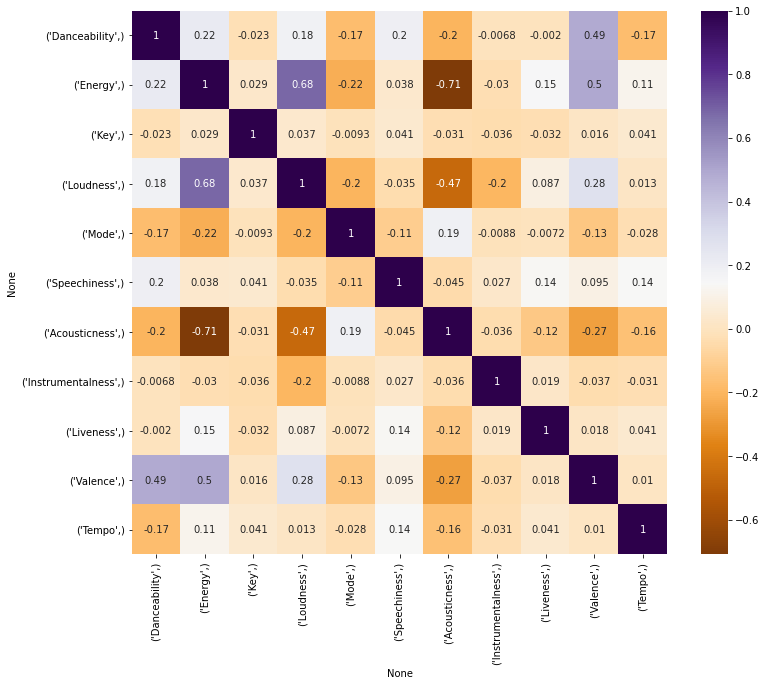

In [36]:
corr = df1_numeric.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            ax=ax,
            cmap='PuOr'
           )

In [54]:
X = df1_numeric

In [55]:
X_prep = StandardScaler().fit_transform(X)

In [56]:
df_cluster = pd.DataFrame(X_prep)

In [57]:
kmeans = KMeans(n_clusters=8, random_state=17)
kmeans.fit(X_prep)

KMeans(random_state=17)

In [58]:
kmeans.inertia_

4750.4797801875075

In [59]:
clusters = kmeans.predict(X_prep)

In [60]:
pd.DataFrame(pd.Series(clusters).value_counts().sort_index(),
            columns=['count'])

,count
0,139
1,186
2,116
3,102
4,8
5,181
6,36
7,82


In [64]:
X_df = pd.DataFrame(X)

In [68]:
X_df['Cluster'] = clusters

In [73]:
X_df

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Cluster
0,0.733,0.6240,4,-9.849,1,0.0374,0.6230,0.000000,0.4070,0.912,114.586,7
1,0.730,0.6020,6,-3.782,0,0.2060,0.3620,0.000004,0.1690,0.927,97.954,1
2,0.345,0.0581,3,-17.217,1,0.0374,0.9760,0.000366,0.1030,0.304,174.117,2
3,0.616,0.6380,9,-11.878,1,0.0350,0.0154,0.455000,0.3210,0.498,130.007,4
4,0.389,0.3960,7,-7.999,1,0.0332,0.8870,0.000000,0.0828,0.585,171.860,2
...,...,...,...,...,...,...,...,...,...,...,...,...
845,0.878,0.6190,6,-5.560,1,0.1020,0.0533,0.000000,0.1130,0.639,136.041,5
846,0.585,0.6200,3,-8.090,0,0.0327,0.0426,0.002240,0.1500,0.281,101.939,0
847,0.901,0.4000,0,-8.575,1,0.1260,0.0510,0.000000,0.0599,0.346,135.984,5
848,0.760,0.4790,2,-5.574,1,0.0466,0.5560,0.000000,0.0703,0.913,89.911,5


In [74]:
df = pd.concat([df1_nonnumeric, X_df], axis=1)

In [75]:
df

,Song,Artist,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Cluster
0,Cry to Me,Solomon Burke,0.733,0.6240,4,-9.849,1,0.0374,0.6230,0.000000,0.4070,0.912,114.586,7
1,"Independent Women, Pt. 1",Destiny's Child,0.730,0.6020,6,-3.782,0,0.2060,0.3620,0.000004,0.1690,0.927,97.954,1
2,Mad World (Feat. Michael Andrews),Gary Jules,0.345,0.0581,3,-17.217,1,0.0374,0.9760,0.000366,0.1030,0.304,174.117,2
3,It'S A Kind Of Magic (Highlander),Queen,0.616,0.6380,9,-11.878,1,0.0350,0.0154,0.455000,0.3210,0.498,130.007,4
4,The Times They Are A-Changin',Bob Dylan,0.389,0.3960,7,-7.999,1,0.0332,0.8870,0.000000,0.0828,0.585,171.860,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,Old Town Road - Remix,Lil Nas X,0.878,0.6190,6,-5.560,1,0.1020,0.0533,0.000000,0.1130,0.639,136.041,5
846,Lights Up,Harry Styles,0.585,0.6200,3,-8.090,0,0.0327,0.0426,0.002240,0.1500,0.281,101.939,0
847,Talk (feat. Disclosure),Khalid,0.901,0.4000,0,-8.575,1,0.1260,0.0510,0.000000,0.0599,0.346,135.984,5
848,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,0.760,0.4790,2,-5.574,1,0.0466,0.5560,0.000000,0.0703,0.913,89.911,5


In [76]:
df.to_csv('Lib.csv', index = False)